In [1]:
import scipy as sp
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd

# Infos relevantes

- Todos os calculos de tamanho serão usados na medida de $mm$ já que para dilatações (a maior parte desse trabalho) está unidade será mais apropriada, para que não se tenham que usar infindáveis casa decimais
- Para erros de funções usarei a notação erro da função $f(x)$ é igual a $\Delta\bar{f}$
- Para erros em medições a notação usada será $\sigma_m$ para uma medição $m$



# Ler os dados

Lembrar de preservar a coluna do $t$, e não torna-la o index, já que preciso trabalhar com o erro em $t$

In [2]:
dataset = pd.read_csv("dilatacao.csv") #, index_col="t") -> 
dataset.head()

,t,BARRA DE FERRO,BARRA DE ALUMINIO,BARRA DE LATA
0,0,0.450,0.85,0.740
1,5,0.440,0.87,0.730
2,10,0.420,0.84,0.710
3,15,0.410,0.81,0.685
4,20,0.395,0.79,0.670


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   t                  51 non-null     int64  
 1   BARRA DE FERRO     51 non-null     float64
 2   BARRA DE ALUMINIO  51 non-null     float64
 3   BARRA DE LATA      51 non-null     float64
dtypes: float64(3), int64(1)
memory usage: 1.7 KB


In [4]:
len(dataset["BARRA DE ALUMINIO"]) + len(dataset["BARRA DE FERRO"]) + len(dataset["BARRA DE LATA"])

153

# Tabela de erros de medição

## Dilatação 
Sendo $\sigma_d$ o erro na medição da dilatação este é dado pela equação:
$$
\sigma_d =\frac{R(d)}{2} \cdot N
$$
onde:
- $R(d)$ é o range de medição desse medidor de dilatação
- $N$ é a quantidade total de medições realizadas por este

portanto:
$$
\sigma_d = \frac{0.01mm}{2} \cdot 51 \\
\sigma_d = 0.255mm
$$

## Tempo

Sendo $\sigma_t$ o erro na medição do tempo, este é dado pela equação:
$$
\sigma_t = \frac{R(t)}{2} \cdot N
$$

onde, para t:
- $R(t) = 0.01s$
- $N = 153$

Portanto:
$$
\sigma_t = \frac{0.01s}{2} \cdot 153 \\
\sigma_t = 0.765s
$$

## Tamanho das barras
$$
\sigma_L = \frac{R(L)}{2} \cdot 3 \\
\sigma_L = .5 \cdot 3 \\
\sigma_L = 1.5 mm
$$


## Resfriamento com dilatação

Sendo $\Delta\bar f$ o erro em $f$, temos:
$$
\Delta L = \Delta L_0 e ^{-kt}\\
\log(\Delta L) = \log(L_0) -kt \\
f = k = -\frac{ \log(\Delta L_0)}{ t\log(\Delta L)}
$$
<br/>
<br/>
$$
\Delta\bar f = \sqrt{\left(\frac{\partial f}{\partial t}\right)^2\left(\sigma_t\right)^2 \left(\frac{\partial f}{\partial(\Delta L)}\right)^2 \left(\sigma_{\Delta L}\right)^2}
$$
$$
\Delta\bar f = \sqrt{ \left( \frac{ - \log(\Delta L) }{t^2\log(\Delta L_0)} \right)^2 (0.765)^2 + \left( \frac{1}{t\Delta L\log(\Delta L_0)} \right)^2 (0.255)^2 }
$$

In [5]:
def erro(Delta_L, Delta_L_0, t):
    tem = ( - np.log(Delta_L_0)/(t**2*np.log(Delta_L)))**2 * (0.765)**2
    dil = (1/(t*Delta_L*np.log(Delta_L_0)))**2 * (.255)**2
    return np.sqrt(tem+dil)

In [6]:
erros = {
    "dilatacao":0.255/10,
    "tempo":0.765,
    "largura":1.5
}

# Calculo

Utilizando a equação:
$$
\Delta L = L_0 \alpha \Delta T
$$

e sabendo que esquentamos a barra à 100ºC (temperatura de ebulição da água), podemos comparar o tamanho original da barra, $L_0 = 520 \pm 1.5$, assim temos:
$$
\alpha = \frac{\Delta L}{L_0 \Delta T} \\
\alpha_{ferro} = 0.000011 \\
\alpha_{aluminio} = 0.000021 \\
\alpha_{latao} = 0.000018
$$

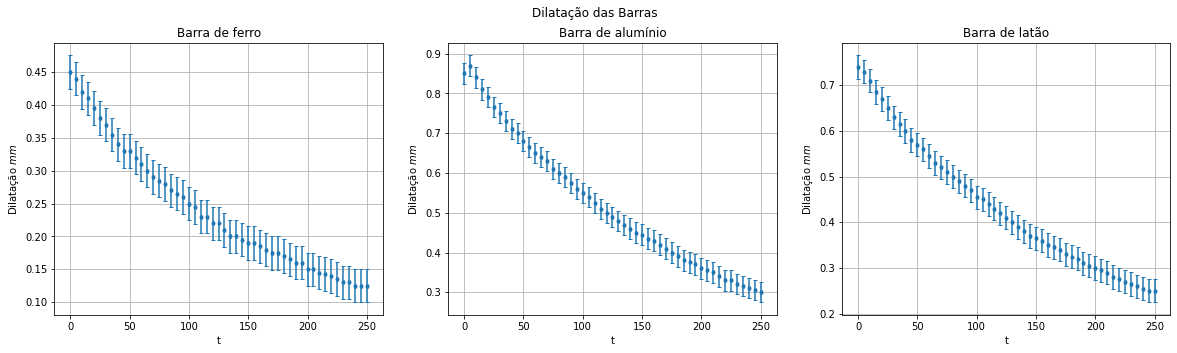

In [7]:
fig, ax = plt.subplots(1,3, figsize=(20, 5))
fig.suptitle("Dilatação das Barras")
for axes in ax:
    axes.set_xlabel("t")
    axes.grid()
    axes.set_ylabel(r"Dilatação $mm$")

ax[0].errorbar(dataset['t'], dataset['BARRA DE FERRO'], xerr=np.ones_like(dataset["t"])*erros["tempo"], yerr=np.ones_like(dataset["BARRA DE FERRO"])*erros["dilatacao"], fmt=".", capsize=2)
ax[0].set_title("Barra de ferro")

ax[1].errorbar(dataset['t'], dataset['BARRA DE ALUMINIO'], xerr=np.ones_like(dataset["t"])*erros["tempo"], yerr=np.ones_like(dataset["BARRA DE FERRO"])*erros["dilatacao"], fmt=".", capsize=2)
ax[1].set_title("Barra de alumínio")

ax[2].errorbar(dataset['t'], dataset['BARRA DE LATA'], xerr=np.ones_like(dataset["t"])*erros["tempo"], yerr=np.ones_like(dataset["BARRA DE FERRO"])*erros["dilatacao"], fmt=".", capsize=2)
ax[2].set_title("Barra de latão")

plt.savefig("Dilatacao-das-barras.png")

In [8]:
def erro_log_bar(value, erro):
    erros = np.ones_like(value)*erro
    return np.sqrt((1/value)**2 * erros**2)

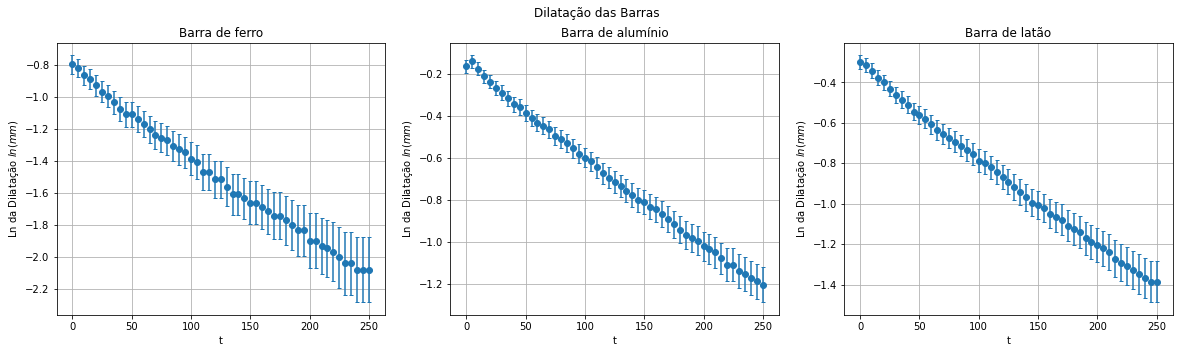

In [9]:
fig, ax = plt.subplots(1,3, figsize=(20, 5))
fig.suptitle("Dilatação das Barras")
for axes in ax:
    axes.set_xlabel("t")
    axes.grid()
    axes.set_ylabel(r"Ln da Dilatação $ln(mm)$")

ax[0].errorbar(dataset['t'], np.log(dataset['BARRA DE FERRO']), xerr=np.ones_like(dataset["t"])*erros["tempo"], yerr=erro_log_bar(dataset["BARRA DE FERRO"], erros["dilatacao"]), fmt="o", capsize=2)
ax[0].set_title("Barra de ferro")

ax[1].errorbar(dataset['t'], np.log(dataset['BARRA DE ALUMINIO']), xerr=np.ones_like(dataset["t"])*erros["tempo"], yerr=erro_log_bar(dataset["BARRA DE ALUMINIO"], erros["dilatacao"]), fmt="o", capsize=2)
ax[1].set_title("Barra de alumínio")

ax[2].errorbar(dataset['t'], np.log(dataset['BARRA DE LATA']), xerr=np.ones_like(dataset["t"])*erros["tempo"], yerr=erro_log_bar(dataset["BARRA DE LATA"], erros["dilatacao"]), fmt="o", capsize=2)
ax[2].set_title("Barra de latão")

plt.savefig("Dilatacao-das-barras-log.png")

In [10]:
model_ferro = LinearRegression()
model_aluminio = LinearRegression()
model_latao = LinearRegression()

model_ferro.fit(dataset["t"].values.reshape(-1,1), np.log(dataset["BARRA DE FERRO"]).values)
model_aluminio.fit(dataset["t"].values.reshape(-1,1), np.log(dataset["BARRA DE ALUMINIO"]).values)
model_latao.fit(dataset["t"].values.reshape(-1,1), np.log(dataset["BARRA DE LATA"]).values)


LinearRegression()

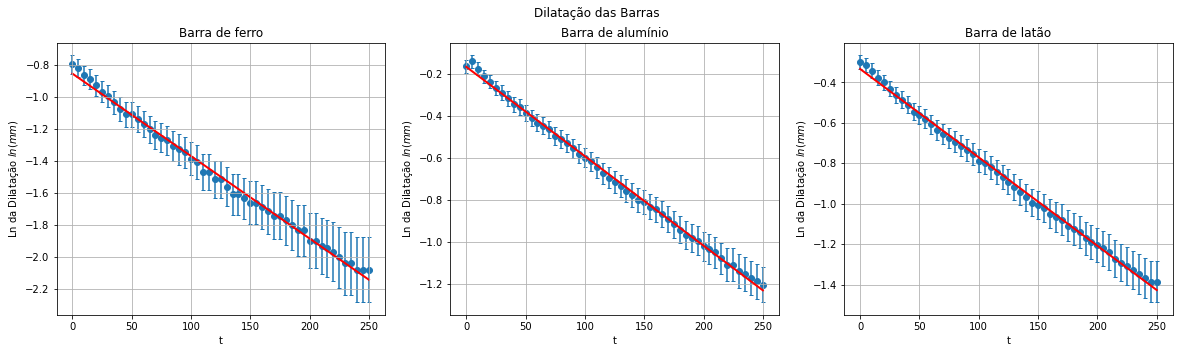

In [11]:
t = np.linspace(dataset["t"].min(), dataset["t"].max(), 500).reshape(-1, 1)

ferro_pred = model_ferro.predict(t)
aluminio_pred = model_aluminio.predict(t)
latao_pred = model_latao.predict(t)

fig, ax = plt.subplots(1,3, figsize=(20, 5))
fig.suptitle("Dilatação das Barras")
for axes in ax:
    axes.set_xlabel("t")
    axes.grid()
    axes.set_ylabel(r"Ln da Dilatação $ln(mm)$")

#ax[0].scatter(dataset['t'], np.log(dataset['BARRA DE FERRO']))
ax[0].plot(t, ferro_pred, c="r", linewidth=2, zorder=1)
ax[0].errorbar(dataset['t'], np.log(dataset['BARRA DE FERRO']), xerr=np.ones_like(dataset["t"])*erros["tempo"], yerr=erro_log_bar(dataset["BARRA DE FERRO"], erros["dilatacao"]), fmt="o", capsize=2, zorder=0)
ax[0].set_title("Barra de ferro")

#ax[1].scatter(dataset['t'], np.log(dataset['BARRA DE ALUMINIO']))
ax[1].plot(t, aluminio_pred, c="r", linewidth=2, zorder=2)
ax[1].errorbar(dataset['t'], np.log(dataset['BARRA DE ALUMINIO']), xerr=np.ones_like(dataset["t"])*erros["tempo"], yerr=erro_log_bar(dataset["BARRA DE ALUMINIO"], erros["dilatacao"]), fmt="o", capsize=2,zorder=1)
ax[1].set_title("Barra de alumínio")

#ax[2].scatter(dataset['t'], np.log(dataset['BARRA DE LATA']))
ax[2].plot(t, latao_pred, c="r", linewidth=2, zorder=10)
ax[2].errorbar(dataset['t'], np.log(dataset['BARRA DE LATA']), xerr=np.ones_like(dataset["t"])*erros["tempo"], yerr=erro_log_bar(dataset["BARRA DE LATA"], erros["dilatacao"]), fmt="o", capsize=2)
ax[2].set_title("Barra de latão")

plt.savefig("Dilatacao-das-barras-log-regressao.png")

In [12]:
K = {
    "ferro": model_ferro.coef_[0],
    "aluminio":model_aluminio.coef_[0],
    "latao":model_latao.coef_[0]
}

In [13]:
erros["k-ferro"] = erro(np.ones_like(dataset["BARRA DE FERRO"])*dataset["BARRA DE FERRO"].max(),
    dataset["BARRA DE FERRO"],
    dataset["t"])
erros["k-aluminio"] = erro(np.ones_like(dataset["BARRA DE ALUMINIO"])*dataset["BARRA DE ALUMINIO"].max(),
    dataset["BARRA DE ALUMINIO"],
    dataset["t"])
erros["k-latao"] = erro(np.ones_like(dataset["BARRA DE LATA"])*dataset["BARRA DE LATA"].max(),
    dataset["BARRA DE LATA"],
    dataset["t"])
#erros

In [14]:
dataset["k-ferro"] = erros["k-ferro"]
dataset["k-aluminio"] = erros["k-aluminio"]
dataset["k-latao"] = erros["k-latao"]

In [15]:
dataset.head(5)

,t,BARRA DE FERRO,BARRA DE ALUMINIO,BARRA DE LATA,k-ferro,k-aluminio,k-latao
0,0,0.450,0.85,0.740,inf,inf,inf
1,5,0.440,0.87,0.730,0.141586,0.422049,0.221314
2,10,0.420,0.84,0.710,0.065848,0.168381,0.100990
3,15,0.410,0.81,0.685,0.042541,0.092873,0.060871
4,20,0.395,0.79,0.670,0.030584,0.062256,0.043098


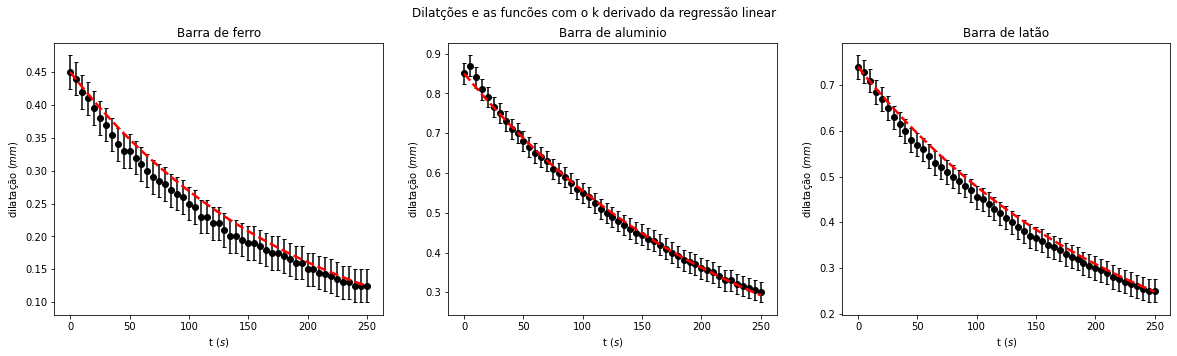

In [16]:
fig, ax = plt.subplots(1,3, figsize=(20, 5))
fig.suptitle("Dilatções e as funcões com o k derivado da regressão linear")
for axes in ax:
    axes.set_xlabel(r"t ($s$)")
    axes.set_ylabel(r"dilatação ($mm$)")

ax[0].set_title("Barra de ferro")
#ax[0].scatter(dataset["t"], dataset["BARRA DE FERRO"])
ax[0].errorbar(dataset['t'], dataset['BARRA DE FERRO'], xerr=np.ones_like(dataset["t"])*erros["tempo"], yerr=np.ones_like(dataset["BARRA DE FERRO"])*erros["dilatacao"], fmt="o", capsize=2, c="k")
ax[0].plot(t, np.exp(K["ferro"]*t)*dataset["BARRA DE FERRO"][0], "--", c="r", zorder=10, linewidth=2.5)

ax[1].set_title("Barra de aluminio")
#ax[1].scatter(dataset["t"], dataset["BARRA DE ALUMINIO"])
ax[1].errorbar(dataset['t'], dataset['BARRA DE ALUMINIO'], xerr=np.ones_like(dataset["t"])*erros["tempo"], yerr=np.ones_like(dataset["BARRA DE FERRO"])*erros["dilatacao"], fmt="o", capsize=2, c="k")
ax[1].plot(t, np.exp(K["aluminio"]*t)*dataset["BARRA DE ALUMINIO"][0], "--", c="r", zorder=10, linewidth=2.5)

ax[2].set_title("Barra de latão")
#ax[2].scatter(dataset["t"], dataset["BARRA DE LATA"])
ax[2].errorbar(dataset['t'], dataset['BARRA DE LATA'], xerr=np.ones_like(dataset["t"])*erros["tempo"], yerr=np.ones_like(dataset["BARRA DE FERRO"])*erros["dilatacao"], fmt="o", capsize=2, c="k")
ax[2].plot(t, np.exp(K["latao"]*t)*dataset["BARRA DE LATA"][0], "--", c="red", zorder=10, linewidth=2.5)

plt.savefig("Dilatacao-das-barras-regressao-ajustada.png")

In [17]:
erros

{'dilatacao': 0.025500000000000002,
 'tempo': 0.765,
 'largura': 1.5,
 'k-ferro': 0          inf
 1     0.141586
 2     0.065848
 3     0.042541
 4     0.030584
 5     0.023473
 6     0.019028
 7     0.015654
 8     0.013148
 9     0.011370
 10    0.010231
 11    0.009049
 12    0.008070
 13    0.007246
 14    0.006544
 15    0.006023
 16    0.005568
 17    0.005095
 18    0.004744
 19    0.004430
 20    0.004090
 21    0.003839
 22    0.003507
 23    0.003354
 24    0.003120
 25    0.002995
 26    0.002794
 27    0.002609
 28    0.002516
 29    0.002392
 30    0.002276
 31    0.002202
 32    0.002100
 33    0.002004
 34    0.001913
 35    0.001859
 36    0.001777
 37    0.001701
 38    0.001628
 39    0.001586
 40    0.001494
 41    0.001458
 42    0.001398
 43    0.001356
 44    0.001311
 45    0.001258
 46    0.001208
 47    0.001182
 48    0.001136
 49    0.001113
 50    0.001091
 dtype: float64,
 'k-aluminio': 0          inf
 1     0.422049
 2     0.168381
 3     0.092873
 4     0

```python
def f(t, k):
    return dataset["BARRA DE FERRO"][0]*np.exp(-k*t)
fitado = sp.optimize.curve_fit(f, dataset["t"].values, dataset["BARRA DE FERRO"].values)
valor = fitado[0]
```

In [21]:
for k, v in K.items():
    print(k, "->", -v)

ferro -> 0.005145686817016992
aluminio -> 0.004265447220159503
latao -> 0.004372051857517287
